## Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset
### Introduction
- To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.
### Descriptive Analytics for Numerical Columns
- Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.
- Steps:
    - Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).
    - Identify numerical columns in the dataset.
    - Calculate the mean, median, mode, and standard deviation for these columns.
    - Provide a brief interpretation of these statistics.
### Data Visualization
- Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.
- Histograms:
    - Plot histograms for each numerical column.
    - Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.
- Box Plots:
    - Create boxplots for numerical variables to identify outliers and the interquartile range.
    - Discuss any findings, such as extreme values or unusual distributions.
- Bar Chart Analysis for Categorical Column:
    - Identify categorical columns in the dataset.
    - Create bar charts to visualize the frequency or count of each category.
    - Analyze the distribution of categories and provide insights.
### Conclusion
- Summarize the key findings from the descriptive analytics and data visualizations.


In [2]:
import pandas as pd

In [19]:
# Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).
df = pd.read_csv('sales_data_with_discounts.csv')
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [20]:
# Identify numerical columns in the dataset.
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:", numerical_cols)

Numerical columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [21]:
# Calculate the mean, median, mode, and standard deviation for these columns. in a table format.
# Provide a brief interpretation of these statistics.
stats = {}
for col in numerical_cols:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0]
    std_dev = df[col].std()
    stats[col] = {
        'Mean': mean,
        'Median': median,
        'Mode': mode,
        'Standard Deviation': std_dev
    }

stats_df = pd.DataFrame(stats).T
print("\nStatistical Summary:\n", stats_df)


Statistical Summary:
                            Mean       Median          Mode  Standard Deviation
Volume                 5.066667     4.000000      3.000000            4.231602
Avg Price          10453.433333  1450.000000    400.000000        18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000        50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822            4.220602
Discount Amount     3346.499424   988.933733     69.177942         4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801        46358.656624


### Data Visualization
 - Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

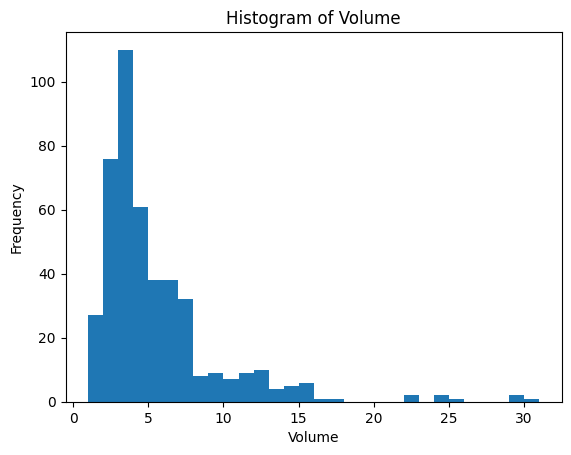

Skewness of Volume: 2.73
The distribution of Volume is highly skewed.
Number of outliers in Volume: 44


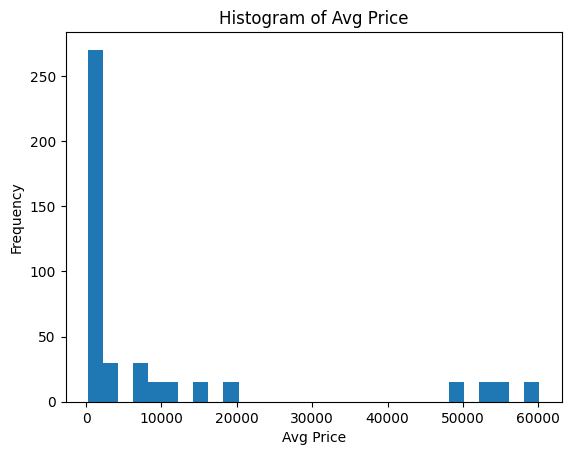

Skewness of Avg Price: 1.91
The distribution of Avg Price is highly skewed.
Number of outliers in Avg Price: 60


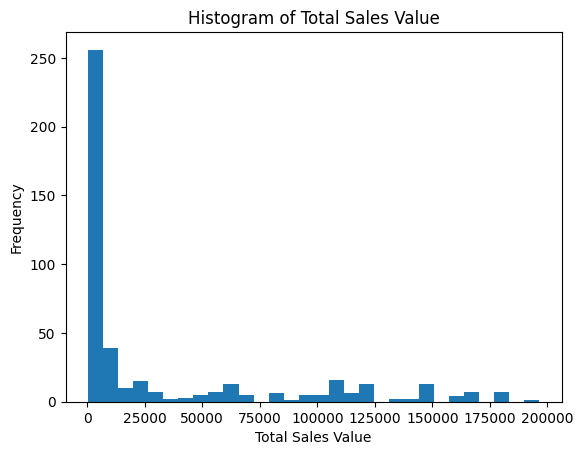

Skewness of Total Sales Value: 1.53
The distribution of Total Sales Value is highly skewed.
Number of outliers in Total Sales Value: 36


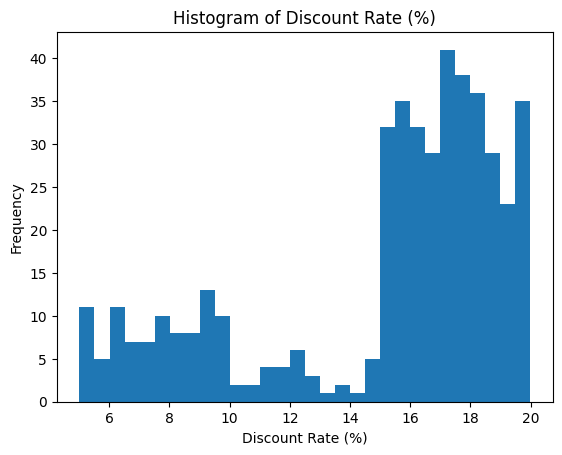

Skewness of Discount Rate (%): -1.06
The distribution of Discount Rate (%) is highly skewed.
Number of outliers in Discount Rate (%): 45


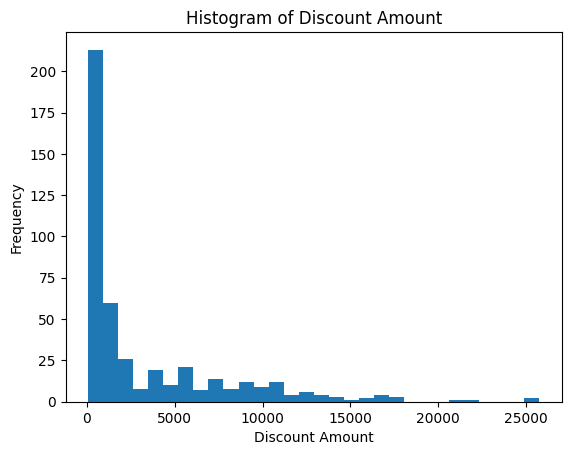

Skewness of Discount Amount: 1.91
The distribution of Discount Amount is highly skewed.
Number of outliers in Discount Amount: 24


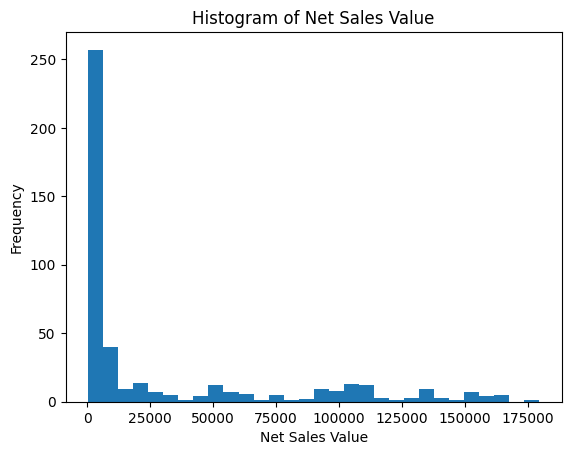

Skewness of Net Sales Value: 1.54
The distribution of Net Sales Value is highly skewed.
Number of outliers in Net Sales Value: 35


In [41]:
# Histograms:
# - Plot histograms for each numerical column.

import matplotlib.pyplot as plt

for col in numerical_cols:
    df[col].plot.hist(bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
# - Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.
# Skewness ≈ 0: The distribution is approximately symmetric.
# Skewness > 0: The distribution is positively (right) skewed.
# Skewness < 0: The distribution is negatively (left) skewed.
    df[col].skew()
    print(f"Skewness of {col}: {round(df[col].skew(),2)}")
    if df[col].skew() > 1 or df[col].skew() < -1:
        print(f"The distribution of {col} is highly skewed.")
    elif df[col].skew() > 0.5 or df[col].skew() < -0.5:
        print(f"The distribution of {col} is moderately skewed.")
    else:
        print(f"The distribution of {col} is approximately symmetric.")

# Presence of outliers can be checked using box plots.
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Number of outliers in {col}: {len(outliers)}')

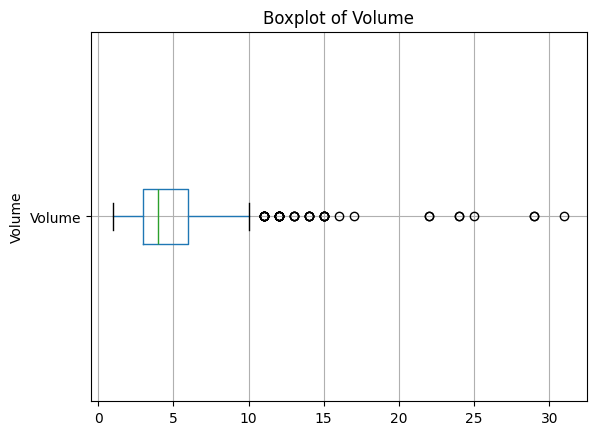

Boxplot analysis for Volume:
There are 35 outliers in the Volume column.


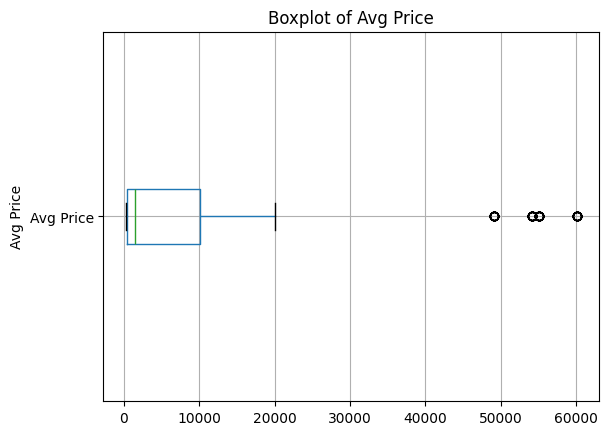

Boxplot analysis for Avg Price:
There are 35 outliers in the Avg Price column.


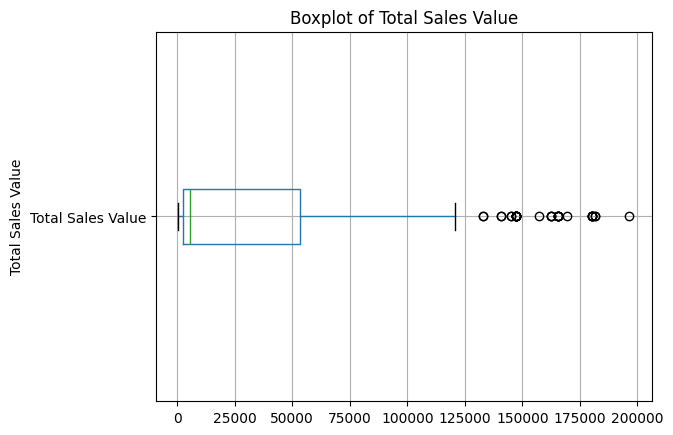

Boxplot analysis for Total Sales Value:
There are 35 outliers in the Total Sales Value column.


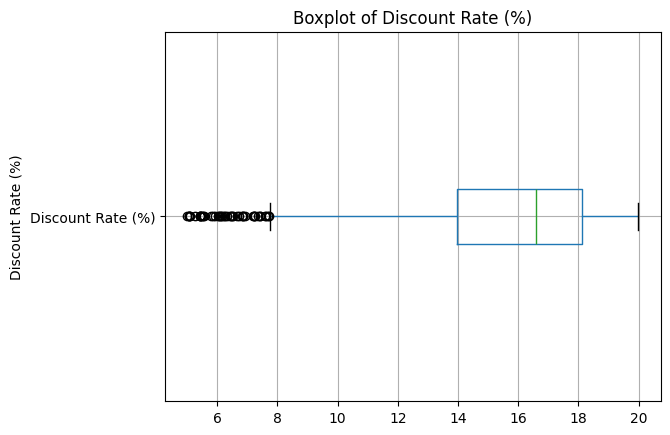

Boxplot analysis for Discount Rate (%):
There are 35 outliers in the Discount Rate (%) column.


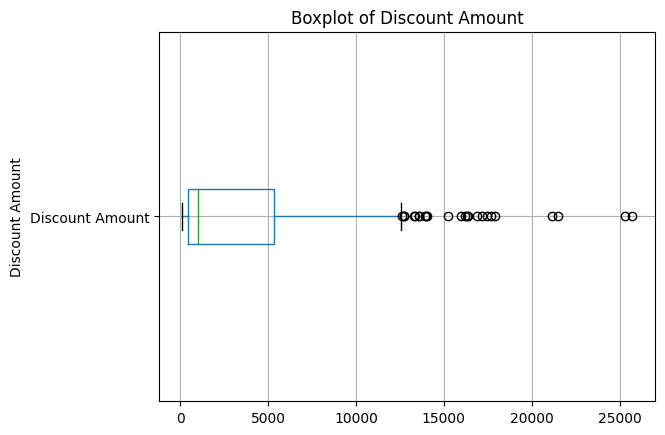

Boxplot analysis for Discount Amount:
There are 35 outliers in the Discount Amount column.


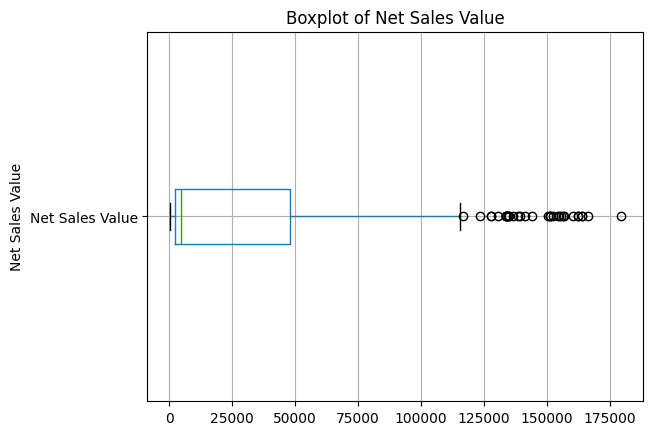

Boxplot analysis for Net Sales Value:
There are 35 outliers in the Net Sales Value column.


In [42]:
# - Box Plots:
#     - Create boxplots for numerical variables to identify outliers and the interquartile range.
for col in numerical_cols:
    df.boxplot(column=col, vert=False)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

#     - Discuss any findings, such as extreme values or unusual distributions.
    print(f'Boxplot analysis for {col}:')
    if len(outliers) > 0:
        print(f'There are {len(outliers)} outliers in the {col} column.')
    else:
        print(f'There are no outliers in the {col} column.')



Categorical columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


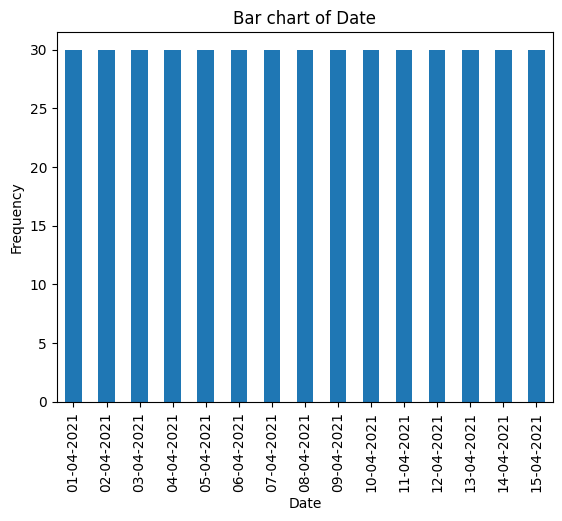

Value counts for Date:
Date
01-04-2021    30
02-04-2021    30
03-04-2021    30
04-04-2021    30
05-04-2021    30
06-04-2021    30
07-04-2021    30
08-04-2021    30
09-04-2021    30
10-04-2021    30
11-04-2021    30
12-04-2021    30
13-04-2021    30
14-04-2021    30
15-04-2021    30
Name: count, dtype: int64


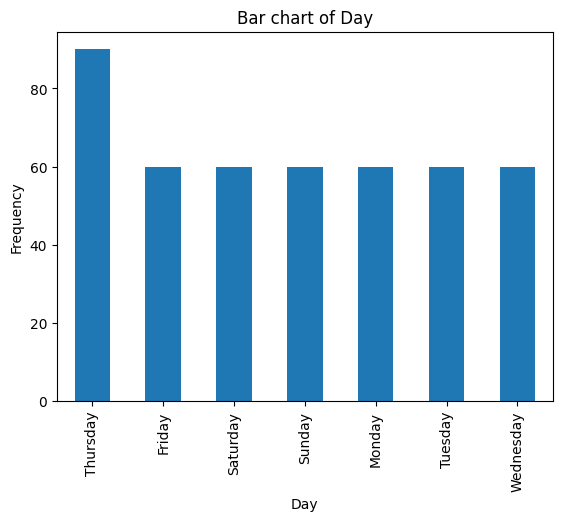

Value counts for Day:
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64


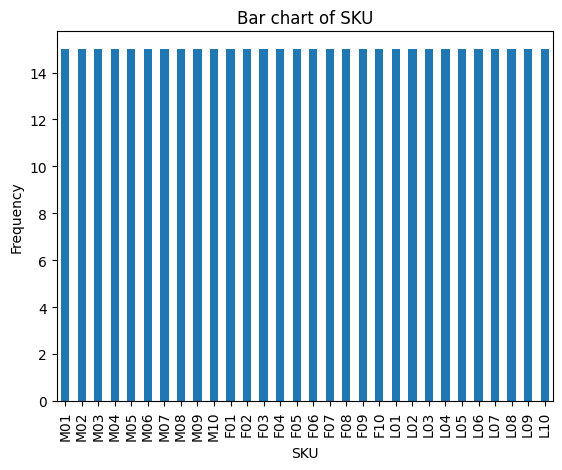

Value counts for SKU:
SKU
M01    15
M02    15
M03    15
M04    15
M05    15
M06    15
M07    15
M08    15
M09    15
M10    15
F01    15
F02    15
F03    15
F04    15
F05    15
F06    15
F07    15
F08    15
F09    15
F10    15
L01    15
L02    15
L03    15
L04    15
L05    15
L06    15
L07    15
L08    15
L09    15
L10    15
Name: count, dtype: int64


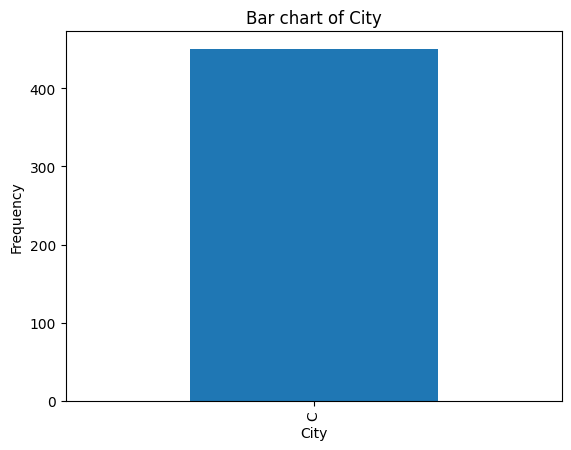

Value counts for City:
City
C    450
Name: count, dtype: int64


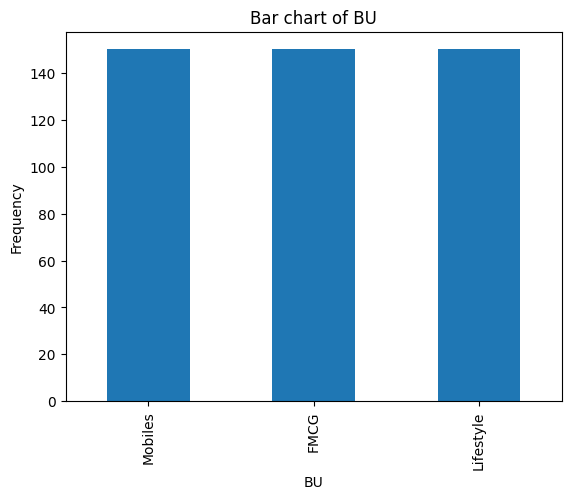

Value counts for BU:
BU
Mobiles      150
FMCG         150
Lifestyle    150
Name: count, dtype: int64


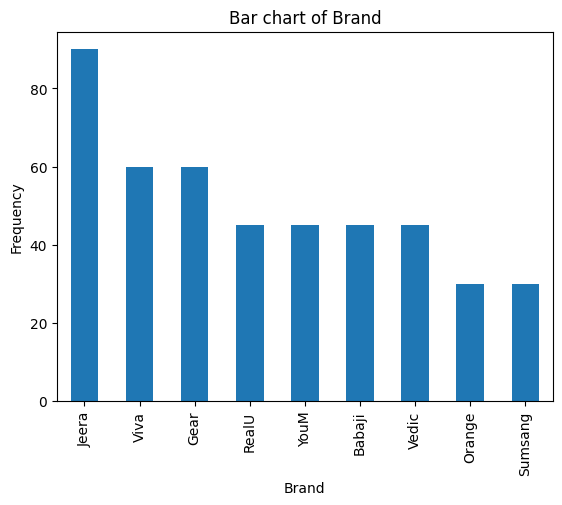

Value counts for Brand:
Brand
Jeera      90
Viva       60
Gear       60
RealU      45
YouM       45
Babaji     45
Vedic      45
Orange     30
Sumsang    30
Name: count, dtype: int64


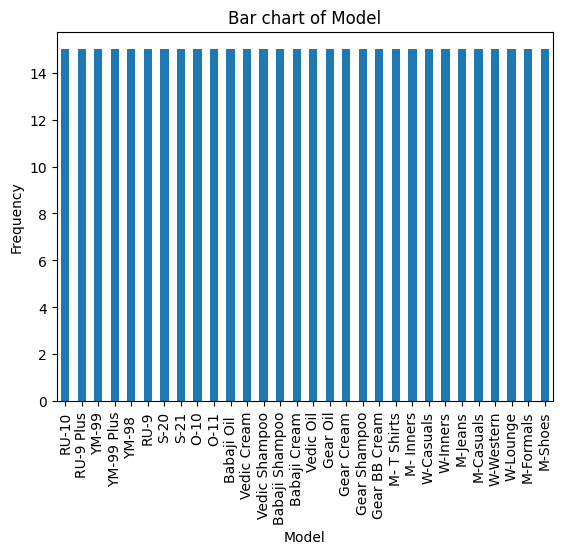

Value counts for Model:
Model
RU-10             15
RU-9 Plus         15
YM-99             15
YM-99 Plus        15
YM-98             15
RU-9              15
S-20              15
S-21              15
O-10              15
O-11              15
Babaji Oil        15
Vedic Cream       15
Vedic Shampoo     15
Babaji Shampoo    15
Babaji Cream      15
Vedic Oil         15
Gear Oil          15
Gear Cream        15
Gear Shampoo      15
Gear BB Cream     15
M- T Shirts       15
M- Inners         15
W-Casuals         15
W-Inners          15
M-Jeans           15
M-Casuals         15
W-Western         15
W-Lounge          15
M-Formals         15
M-Shoes           15
Name: count, dtype: int64


In [45]:
# Bar Chart Analysis for Categorical Column:
#     - Identify categorical columns in the dataset.
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_cols)

#     - Create bar charts to visualize the frequency or count of each category.
for col in categorical_cols:
    df[col].value_counts().plot.bar()
    plt.title(f'Bar chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
#     - Analyze the distribution of categories and provide insights.
    print(f'Value counts for {col}:\n{df[col].value_counts()}')

In [ ]:
### Conclusion
# - Summarize the key findings from the descriptive analytics and data visualizations.
# ================================================================================================================================================================= #

# From the Descriptive Analytics, The mean, median, mode, and standard deviation provide insights into the central tendency and variability of the numerical data.

# From the Data Visualization:
# - Histograms reveal the distribution of numerical variables, with some columns exhibiting skewness.
# - Box plots further highlight the presence of outliers in certain numerical columns, which may require further data transformation.
# - Bar charts for categorical variables show the frequency distribution of different categories, providing insights into the most repeated values in the data.